In [1]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

/home/jn107154/miniconda3/envs/tfgpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [3]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['categorical_accuracy'])+1),model_history.history['categorical_accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_categorical_accuracy'])+1),model_history.history['val_categorical_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['categorical_accuracy'])+1),len(model_history.history['categorical_accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


In [4]:
np.random.seed(2017)

#import cifar10
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

print("dimensions", train_features.shape)

dimensions (50000, 3, 32, 32)


In [5]:
# scale the features
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [6]:
# optimizer
Adadelta = keras.optimizers.Adadelta()


In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, (4, 4), padding='same', input_shape=(3, 32, 32)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(64, (2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization()) # temp
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(BatchNormalization()) # temp
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 32, 32)        3136      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 64, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 16, 16)        16448     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 16, 16)        64        
__________

In [9]:
from keras.metrics import categorical_accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adadelta, metrics=[categorical_accuracy])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
# Train the model
start = datetime.now()
model_info = model.fit(train_features, train_labels, 
                       batch_size=32, epochs=50, 
                       validation_data = (test_features, test_labels), 
                       verbose=1)
end = datetime.now()

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 33s 664us/step - loss: 1.9895 - categorical_accuracy: 0.2957 - val_loss: 1.7721 - val_categorical_accuracy: 0.3454
Epoch 2/50
50000/50000 [==============================] - 31s 610us/step - loss: 1.5340 - categorical_accuracy: 0.4388 - val_loss: 1.4789 - val_categorical_accuracy: 0.4628
Epoch 3/50
50000/50000 [==============================] - 31s 617us/step - loss: 1.3663 - categorical_accuracy: 0.5056 - val_loss: 1.2163 - val_categorical_accuracy: 0.5594
Epoch 4/50
50000/50000 [==============================] - 31s 615us/step - loss: 1.2531 - categorical_accuracy: 0.5537 - val_loss: 1.2260 - val_categorical_accuracy: 0.5649
Epoch 5/50
50000/50000 [==============================] - 31s 619us/step - loss: 1.1579 - categorical_accuracy: 0.5902 - val_loss: 1.2184 - val_categorical_accuracy: 0.5580
Epoch 6/50
50000/50000 [==============================] - 31s 618us/step - loss: 1.10

Epoch 48/50
50000/50000 [==============================] - 31s 617us/step - loss: 0.6529 - categorical_accuracy: 0.7779 - val_loss: 0.6737 - val_categorical_accuracy: 0.7751
Epoch 49/50
50000/50000 [==============================] - 31s 614us/step - loss: 0.6541 - categorical_accuracy: 0.7775 - val_loss: 0.7322 - val_categorical_accuracy: 0.7556
Epoch 50/50
50000/50000 [==============================] - 31s 614us/step - loss: 0.6520 - categorical_accuracy: 0.7788 - val_loss: 0.6560 - val_categorical_accuracy: 0.7752


In [11]:
print("Model took %0.2f seconds to train", (end - start))

Model took %0.2f seconds to train 0:25:43.553009


In [12]:
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 77.52


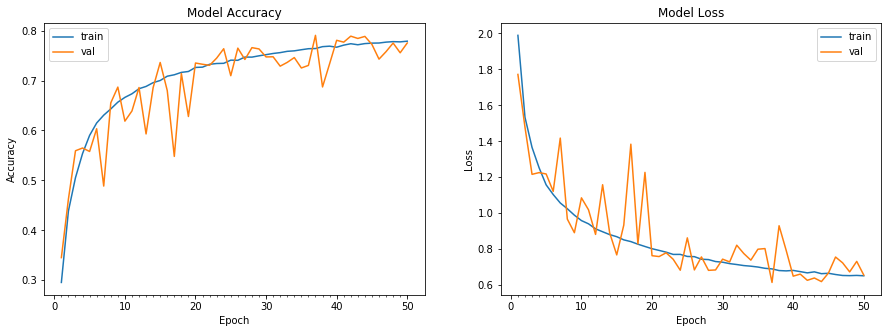

In [13]:
# plot model history
plot_model_history(model_info)

In [14]:
Adam = keras.optimizers.Adam(lr=0.0001)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adadelta, metrics=[categorical_accuracy])

In [16]:
# Train the model
start = datetime.now()
model_info_2 = model.fit(train_features, train_labels, 
                       batch_size=32, epochs=100, 
                       validation_data = (test_features, test_labels), 
                       verbose=1)
end = datetime.now()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 33s 651us/step - loss: 0.6478 - categorical_accuracy: 0.7814 - val_loss: 0.6103 - val_categorical_accuracy: 0.7943
Epoch 2/100
50000/50000 [==============================] - 31s 616us/step - loss: 0.6421 - categorical_accuracy: 0.7814 - val_loss: 0.6028 - val_categorical_accuracy: 0.7960
Epoch 3/100
50000/50000 [==============================] - 31s 614us/step - loss: 0.6384 - categorical_accuracy: 0.7833 - val_loss: 0.6275 - val_categorical_accuracy: 0.7882
Epoch 4/100
50000/50000 [==============================] - 31s 613us/step - loss: 0.6339 - categorical_accuracy: 0.7852 - val_loss: 0.7654 - val_categorical_accuracy: 0.7453
Epoch 5/100
50000/50000 [==============================] - 31s 612us/step - loss: 0.6319 - categorical_accuracy: 0.7856 - val_loss: 0.5885 - val_categorical_accuracy: 0.7987
Epoch 6/100
50000/50000 [==============================] - 31s 612us/step - loss

50000/50000 [==============================] - 31s 611us/step - loss: 0.5729 - categorical_accuracy: 0.8055 - val_loss: 0.6215 - val_categorical_accuracy: 0.7899
Epoch 48/100
50000/50000 [==============================] - 30s 607us/step - loss: 0.5726 - categorical_accuracy: 0.8083 - val_loss: 0.5978 - val_categorical_accuracy: 0.7989
Epoch 49/100
50000/50000 [==============================] - 31s 611us/step - loss: 0.5661 - categorical_accuracy: 0.8095 - val_loss: 0.5388 - val_categorical_accuracy: 0.8196
Epoch 50/100
50000/50000 [==============================] - 31s 610us/step - loss: 0.5692 - categorical_accuracy: 0.8066 - val_loss: 0.5453 - val_categorical_accuracy: 0.8180
Epoch 51/100
50000/50000 [==============================] - 31s 615us/step - loss: 0.5665 - categorical_accuracy: 0.8087 - val_loss: 0.5700 - val_categorical_accuracy: 0.8101
Epoch 52/100
50000/50000 [==============================] - 30s 598us/step - loss: 0.5623 - categorical_accuracy: 0.8113 - val_loss: 0.555

Epoch 94/100
50000/50000 [==============================] - 30s 609us/step - loss: 0.5329 - categorical_accuracy: 0.8233 - val_loss: 0.5387 - val_categorical_accuracy: 0.8174
Epoch 95/100
50000/50000 [==============================] - 30s 609us/step - loss: 0.5303 - categorical_accuracy: 0.8202 - val_loss: 0.5617 - val_categorical_accuracy: 0.8105
Epoch 96/100
50000/50000 [==============================] - 30s 609us/step - loss: 0.5317 - categorical_accuracy: 0.8186 - val_loss: 0.5432 - val_categorical_accuracy: 0.8186
Epoch 97/100
50000/50000 [==============================] - 31s 612us/step - loss: 0.5310 - categorical_accuracy: 0.8200 - val_loss: 0.5583 - val_categorical_accuracy: 0.8114
Epoch 98/100
50000/50000 [==============================] - 31s 610us/step - loss: 0.5298 - categorical_accuracy: 0.8210 - val_loss: 0.5583 - val_categorical_accuracy: 0.8169
Epoch 99/100
50000/50000 [==============================] - 30s 610us/step - loss: 0.5344 - categorical_accuracy: 0.8197 - va